In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [ ]:
#checking files in folder -- this notebook is in the same directory

"""
optional

"""
files = os.listdir('./'+sensorFolder)
pp.pprint(files)

In [3]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
pp.pprint(files)

#checking a single file
print(files[0])

[   'spl-deploy-rc3flr/2022-05-18.csv',
    'spl-deploy-rc3flr/2022-05-19.csv',
    'spl-deploy-rc3flr/2022-05-20.csv',
    'spl-deploy-rc3flr/2022-05-21.csv',
    'spl-deploy-rc3flr/2022-05-22.csv',
    'spl-deploy-rc3flr/2022-05-23.csv',
    'spl-deploy-rc3flr/2022-05-24.csv',
    'spl-deploy-rc3flr/2022-05-25.csv',
    'spl-deploy-rc3flr/2022-05-26.csv',
    'spl-deploy-rc3flr/2022-05-27.csv',
    'spl-deploy-rc3flr/2022-05-28.csv',
    'spl-deploy-rc3flr/2022-05-29.csv',
    'spl-deploy-rc3flr/2022-05-30.csv',
    'spl-deploy-rc3flr/2022-05-31.csv',
    'spl-deploy-rc3flr/2022-06-01.csv',
    'spl-deploy-rc3flr/2022-06-02.csv',
    'spl-deploy-rc3flr/2022-06-03.csv',
    'spl-deploy-rc3flr/2022-06-04.csv',
    'spl-deploy-rc3flr/2022-06-05.csv',
    'spl-deploy-rc3flr/2022-06-06.csv',
    'spl-deploy-rc3flr/2022-06-07.csv',
    'spl-deploy-rc3flr/2022-06-08.csv',
    'spl-deploy-rc3flr/2022-06-09.csv',
    'spl-deploy-rc3flr/2022-06-10.csv',
    'spl-deploy-rc3flr/2022-06-11.csv',


In [ ]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
    print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

In [4]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [5]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
# df['time'] = pd.to_datetime(df['time'], unit = 's')
df.rename(columns={'time': 'datetime'}, inplace=True)


In [6]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
# df['hour'] = df['datetime'].dt.hour
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [7]:
#checking file
print(df.head(50))


    Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0            0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1            1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2            2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3            3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4            4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
5            5  63.54  72.25  72.89 2022-05-18 23:59:21.354  2022-05-18   
6            6  64.80  72.67  73.34 2022-05-18 23:59:22.099  2022-05-18   
7            7  63.47  71.40  71.84 2022-05-18 23:59:23.584  2022-05-18   
8            8  63.72  71.85  72.46 2022-05-18 23:59:24.327  2022-05-18   
9            9  64.44  72.09  72.74 2022-05-18 23:59:25.071  2022-05-18   
10          10  63.71  71.70  72.26 2022-05-18 23:59:26.556  2022-05-18   
11          11  63.89  72.16  72.88 2022-05-18 23:59:27.300  2022-05-18   
12          12  64.17  72

In [ ]:
#saving df to csv
# df.to_csv('masterdata.csv') #uncomment to save file locally

## Analyzing Data

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure
import numpy as np
from matplotlib.pyplot import cm


plt.rcParams.update({'font.family':'monospace'})
import matplotlib
%pip install matplotlib==3.4
print(matplotlib.__version__)


Note: you may need to restart the kernel to use updated packages.
3.4.0


In [9]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    ambientEQ = df.groupby(groupbyThisName).quantile(0.1)
    fiftyEQ = df.groupby(groupbyThisName).quantile(0.5)
    minEQ = df.groupby(groupbyThisName).quantile(0.01)
    maxEQ = df.groupby(groupbyThisName).quantile(0.90)
    
    result['ambientEQ'] = ambientEQ['laeq']
    result['fiftyEQ'] = fiftyEQ['laeq']
    result['minsEQ'] = minEQ['laeq']
    result['maxsEQ'] = maxEQ['laeq']

    ambientEQ= ambientEQ['laeq']
    fiftyEQ= fiftyEQ['laeq']
    minsEQ = minEQ['laeq']
    maxsEQ = maxEQ['laeq']

    days = result.index
    means = result['laeq', 'mean']
    
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians, ambientEQ, minsEQ, maxsEQ, fiftyEQ, result;

#### Time-Series: All Data 

In [10]:
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ, TSxDT = getBasicStat(pd.Grouper(key='datetime', freq='30min'))


In [11]:
print(TSxDT.head(50))

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
2022-05-18 18:00:00  66.372950  64.63  83.52  1.175837  66.150    65.470   
2022-05-18 18:30:00  66.313939  64.19  82.15  1.936703  65.760    65.160   
2022-05-18 19:00:00  66.030617  64.22  86.57  1.152926  65.800    65.230   
2022-05-18 19:30:00  66.004194  64.36  78.90  1.172119  65.790    65.210   
2022-05-18 20:00:00  66.171389  64.50  84.83  2.010280  65.750    65.210   
2022-05-18 2

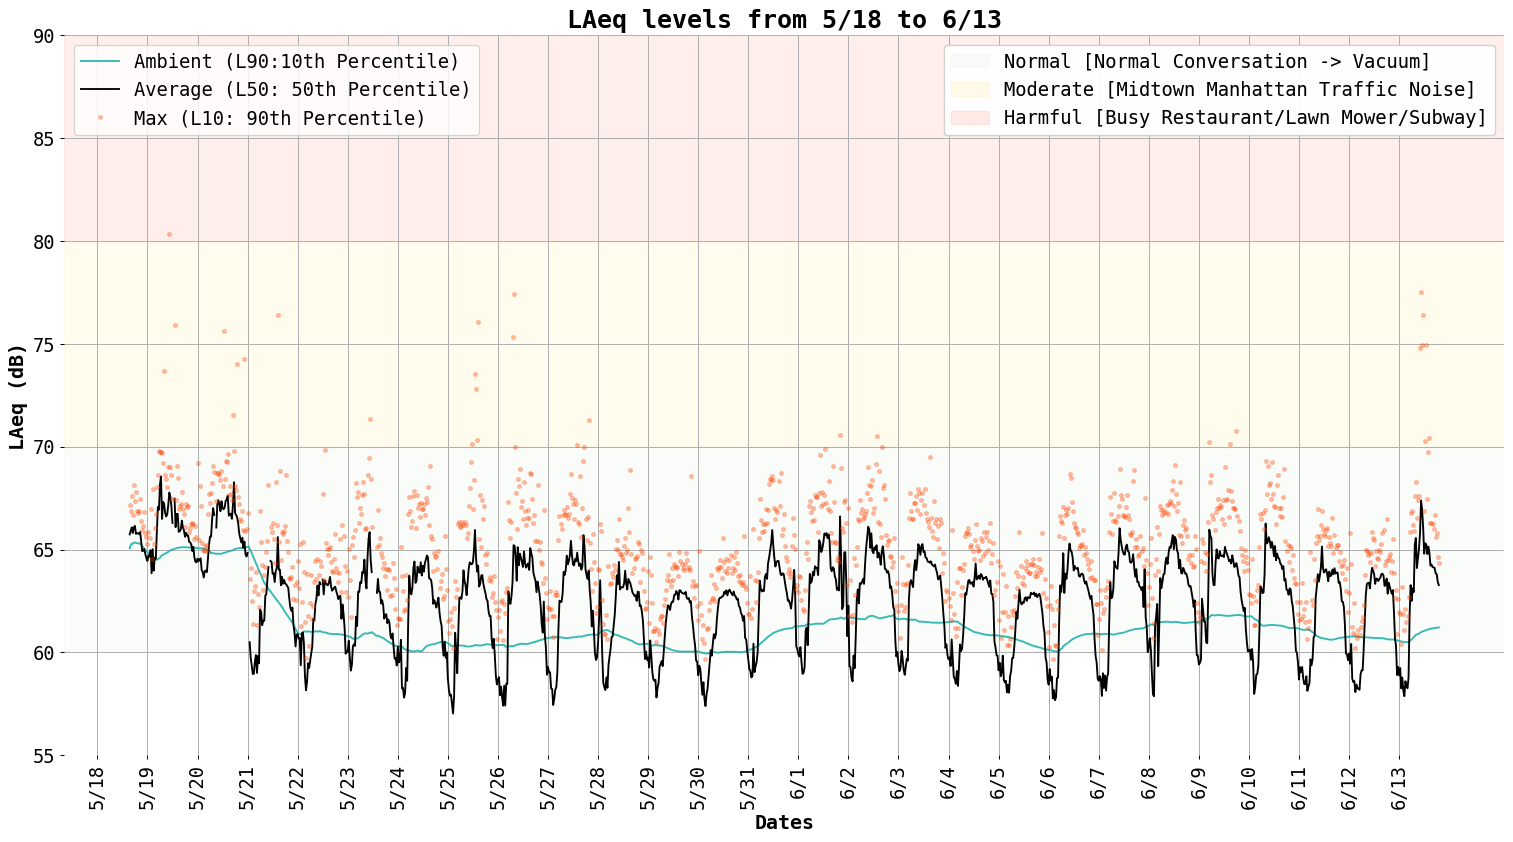

In [228]:
fig = figure(figsize=(16, 8), dpi=90)
ax = fig.add_axes([1, 1, 1, 1])

xlabels = ['/'.join([str(y.month), str(y.day)]) for y in np.unique(DTdays.date)]

rollingAmbient = DTambient.rolling('24H').mean()
AmbientL90, = plt.plot(DTdays, rollingAmbient,'-', c='lightseagreen',label = 'Ambient (L90:10th Percentile)', alpha=0.9)
MeanL50, = plt.plot(DTdays, DTfiftyEQ, '-', c='black',label='Average (L50: 50th Percentile)')
MaxL10,= plt.plot(DTdays, DTmaxsEQ,'.',c='orangered',label = 'Max (L10: 90th Percentile)', alpha=0.3)

ref6070 = plt.axhspan(60, 70,color='green',alpha=0.02, label='Normal [Normal Conversation -> Vacuum]')
ref7080 = plt.axhspan(70, 80,color='gold',alpha=0.07, label='Moderate [Midtown Manhattan Traffic Noise]')
ref8090 = plt.axhspan(80, 90,color='tomato',alpha=0.10, label='Harmful [Busy Restaurant/Lawn Mower/Subway]')

# plt.xticks(DTdays_labelDay)  # Set text labels.
plt.xticks(ticks=np.unique(DTdays.date),labels=xlabels, fontsize=15, rotation=90) # Set text labels.
plt.yticks(fontsize=15, rotation=0) # Set text labels.

plt.xlabel('Dates', fontsize=16, fontweight='bold')
plt.ylabel('LAeq (dB)', fontsize=16,fontweight='bold')
plt.ylim([55,90])
plt.title(f'LAeq levels from {xlabels[0]} to {xlabels[-1]}', fontsize=20, fontweight='bold')
plt.grid(True)

first_legend = plt.legend(handles=[AmbientL90, MeanL50, MaxL10],facecolor = 'white',loc='upper left', fontsize=15)
plt.gca().add_artist(first_legend)
refLegend= plt.legend(handles=[ref6070, ref7080, ref8090],facecolor = 'white',loc='upper right', fontsize=15)
plt.gca().add_artist(refLegend)

# labelLines(plt.gca().get_lines(), zorder=2.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

#### Time Series: Day of Week

In [13]:
# DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ, TSxDT = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
TSxDoW_all = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
TSxDoW = TSxDoW_all[-1]
print(TSxDoW)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 17:00:00  64.728066  62.62  79.67  2.020666  64.110    63.420   
2022-06-13 17:30:00  64.330544  62.57  85.57  1.850873  63.840    63.150   
2022-06-13 18:00:00  64.221661  62.28  84.56  1.708816  63.800    62.940   
2022-06-13 18:30:00  63.666956  62.20  74.28  1.081664  63.430    62.810   
2022-06-13 1

In [14]:
print(TSxDoW.iloc[2]) 
      #== datetime.time(15, 30))
print(TSxDoW.index.time)

laeq       mean      66.44595
           min       64.71000
           max       79.45000
           std        1.41408
           median    66.08000
ambientEQ            65.44000
fiftyEQ              66.08000
minsEQ               65.07990
maxsEQ               67.62000
Name: 2022-05-18 16:30:00, dtype: float64
[datetime.time(15, 30) datetime.time(16, 0) datetime.time(16, 30) ...
 datetime.time(18, 0) datetime.time(18, 30) datetime.time(19, 0)]


In [15]:
def groupWeek(data, showData = False):
    weeks = {}
    wk = pd.DataFrame(columns = data.columns)
    dates = data.index
    c = 0
#     print(type(wk), type(data))

    for d in dates:
        if (d.dayofweek == 6 and d.time() == dates.time.max()):
            c+=1
#             wk.loc[data.index[c]]=data.loc[data.index[c]]
            wk.loc[d]=data.loc[d]
#             print(f'week is {wk}')
            weeks[c] = wk
#             weeks.append(wk)
#             print(f'-----------WEEKS IS NOW {weeks}')
#             print(c)
#             print(weeks['c'])
            wk = pd.DataFrame(columns = data.columns)
#             print(wk)
        else:
#             wk.append(data.loc[d])
#             print(type(wk), wk)
            wk.loc[d]=data.loc[d]
#         print(d.dayofweek)
    if showData == True:
        for key in weeks:
            print("\n" +"="*40)
            print(key)
            print("-"*40)
            print(weeks[key])
    return weeks;

# for d in DateDW.index:
#     print(type(d))
# print(type(DateDW.index[0]))
# print()

In [16]:
groupWeek(TSxDoW)

{1:                           laeq                                 ambientEQ  \
                           mean    min    max       std  median             
 2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
 2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920    65.370   
 2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080    65.440   
 2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800    65.260   
 2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080    65.500   
 ...                        ...    ...    ...       ...     ...       ...   
 2022-05-22 21:30:00  63.090202  59.66  77.86  2.473211  62.330    60.930   
 2022-05-22 22:00:00  62.485377  58.73  81.16  2.764649  61.870    59.775   
 2022-05-22 22:30:00  61.710389  58.08  78.64  2.403682  61.210    59.597   
 2022-05-22 23:00:00  60.431300  57.37  76.72  2.555764  59.935    58.248   
 2022-05-22 23:30:00  60.597643  57.21  72.37  2.309723  60.060    58.079

In [17]:
daysofweekDict = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                  4: 'Friday', 5: 'Saturday', 6: 'Sunday'}


In [18]:
weekInfo = groupWeek(TSxDoW)

In [147]:
weekInfo[1].index[0].date().month

5

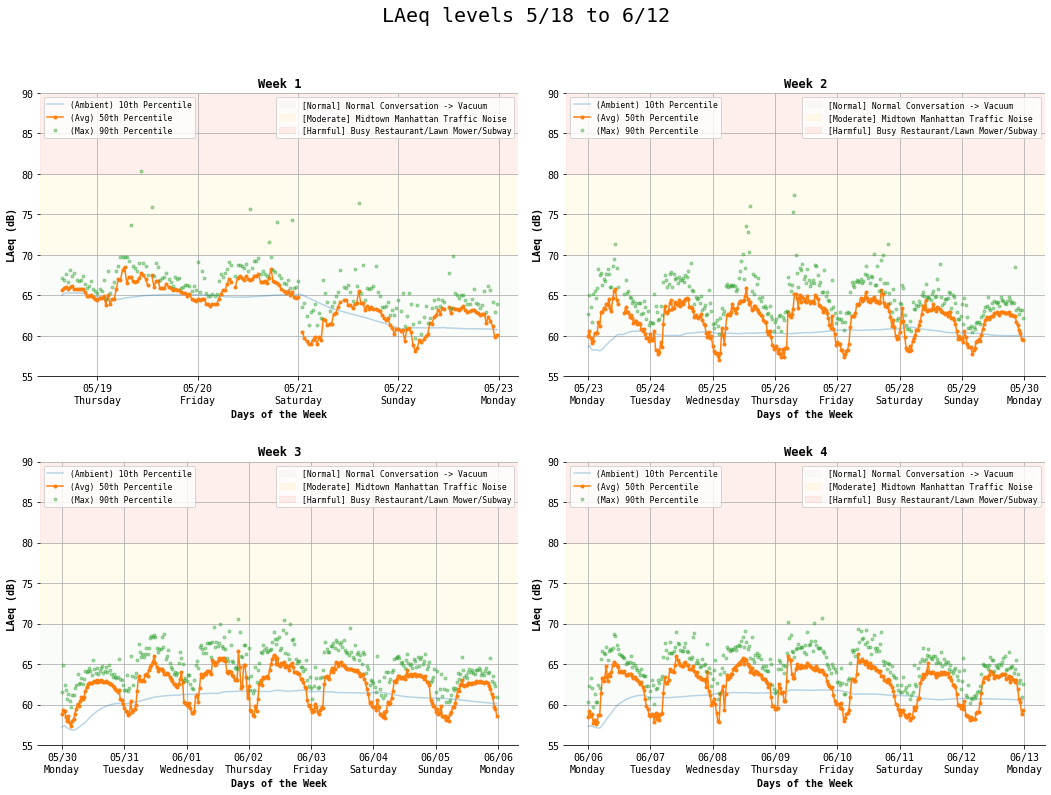

In [154]:
fig1 = plt.figure(figsize=(18, 12))
plt.suptitle(f'LAeq levels {weekInfo[1].index[0].date().month}/{weekInfo[1].index[0].date().day} to {weekInfo[len(weekInfo)].index[-1].date().month}/{weekInfo[len(weekInfo)].index[-1].date().day}', 
             fontweight='normal',
            fontsize=20)

fig1.subplots_adjust(hspace = .3, wspace=.1)

ncols = 2
nrows = len(weekInfo) // ncols + (len(weekInfo) % ncols > 0)

for n,week in enumerate(weekInfo):
    DWlabels = weekInfo[week].index
    DWlabels_DW = [daysofweekDict.get(i) for i in np.unique(weekInfo[week].index.dayofweek)]
    DWambient = weekInfo[week].ambientEQ

    DW50 = weekInfo[week].fiftyEQ
    DW90 = weekInfo[week].maxsEQ


    ax = fig1.add_subplot(ncols,nrows, n+1)
    ax.set_title(f'Week {n+1}', fontweight='bold')
    rollingAmbient = DWambient.rolling('24H').mean()

    pltAmbient,= ax.plot(DWlabels, rollingAmbient, '-', alpha = 0.3, label = '(Ambient) 10th Percentile')
    pltMean, = ax.plot(DWlabels, DW50,'.-', label = '(Avg) 50th Percentile')
    pltMax, = ax.plot(DWlabels, DW90,'.', alpha = 0.4, label = '(Max) 90th Percentile')
    
    
    ax.set_xlabel('Days of the Week', fontweight='bold')
    ax.set_ylabel('LAeq (dB)', fontweight='bold')
    ax.set_ylim([55,90])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%A')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ref6070 = ax.axhspan(60, 70,color='green',alpha=0.02, label='[Normal] Normal Conversation -> Vacuum')
    ref7080 = ax.axhspan(70, 80,color='gold',alpha=0.07, label='[Moderate] Midtown Manhattan Traffic Noise')
    ref8090 = ax.axhspan(80, 90,color='tomato',alpha=0.10, label='[Harmful] Busy Restaurant/Lawn Mower/Subway')

    refLegend = ax.legend(handles=[ref6070, ref7080, ref8090],facecolor = 'white',loc='upper right', fontsize=8)
    plt.gca().add_artist(refLegend)
    plt.legend(handles=[pltAmbient,pltMean, pltMax],facecolor = 'white',loc='upper left', fontsize=8)
    
    ax.grid(True)


## -------------------------

#### Heat Map: Average Hourly LAeq Levels per Day of Week

In [ ]:
import seaborn as sns

In [ ]:
HMxHR_all = getBasicStat(pd.Grouper(key='datetime', freq='1H'))
HMxHR = HMxHR_all[-1]
HMxHR['dayofweek'] = HMxHR.index.dayofweek
HMxHR['hour'] = HMxHR.index.hour
print(HMxHR)

In [ ]:
HMxHRxWK = groupWeek(HMxHR)
print(HMxHRxWK)

In [ ]:
def plotHeatMap(datadict, column, index, values, labelDoW=False):
    for wk in datadict:
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)
        
        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)
        df3.index = df3.index.astype(int)

        fig, ax = plt.subplots(figsize=(20, 5))
        hm = sns.heatmap(df3.T, vmin = 55, vmax = 70, linewidths=.5,cmap='YlOrRd', cbar_kws={'label': 'dB'});
        hm.set_yticklabels([daysofweekDict.get(i) for i in df3.columns])

#         hm.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
#         hm.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 
        if labelDoW == True:
            hm.set_xticks(np.arange(len(timeofdayDict.values()))+0.5)
            hm.set_xticklabels(timeofdayDict.values(), rotation=90)
        plt.setp(hm.get_yticklabels(), rotation=0, horizontalalignment='right')

        plt.xlabel('Hour', weight='bold')
        plt.ylabel('Day of Week', weight='bold')
        plt.title(f'{dateLabels[0]} to {dateLabels[-1]}', weight='bold')
#     plt.suptitle('Weekly Heat Map of LAeq 50th Percentile Levels', weight='normal', x = 0.95)


In [ ]:
plotHeatMap(HMxHRxWK, 'dayofweek', 'hour', 'fiftyEQ')

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [ ]:
HMxTD_all = getBasicStat(pd.Grouper(key='datetime', freq='6H'))
HMxTD = HMxTD_all[-1]
HMxTD['dayofweek'] = HMxTD.index.dayofweek
HMxTD['hour'] = HMxTD.index.hour
print(HMxTD)


timeofdayDict = {0: 'Early Morning\n(12am-6am)', 
                 6: 'Morning\n(6am-12pm)', 
                 12: 'Afternoon\n(12pm-6pm)', 
                 18: 'Night\n(6pm-12am)'}

In [ ]:
HMxTD['timeofday'] = [timeofdayDict.get(i) for i in HMxTD.index.hour]
# print(HMxTD)

In [ ]:
HMxTDxWK = groupWeek(HMxTD)
print(HMxTDxWK)

In [ ]:
plotHeatMap(HMxTDxWK, 'dayofweek','hour', 'fiftyEQ',labelDoW = True)


==========================================================

#### Heatmap of Aggregate Data sorted by Time of Day

In [ ]:
# print(HMxTD)
dfAG = HMxTD.copy()
dfAG = dfAG.reset_index().pivot_table(columns = 'dayofweek',index = 'hour', values='fiftyEQ')
dfAG.columns = dfAG.columns.droplevel(0)
print(dfAG.columns)

print(dfAG)
fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(dfAG, annot = True,vmin = 55, vmax = 70, linewidths=.75,cmap='YlOrRd', cbar_kws={'label': 'dB'});

hm.set_xticklabels([daysofweekDict.get(i) for i in dfAG.columns])
hm.set_yticks(np.arange(len(timeofdayDict.values()))+0.5)
hm.set_yticklabels(timeofdayDict.values(), rotation=0)
plt.setp(hm.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Time of Day', fontweight='bold')
plt.title(f'Aggregate Heat Map of LAeq 50th Percentile Levels', fontweight='bold', y =1.05)

#### Heatmap of Aggregate Data sorted by Hour

In [ ]:
wkData = HMxHR.copy()
# print(wkData)
dateLabels = np.unique(wkData.index.date)

df3 = wkData.reset_index().pivot_table(columns='dayofweek',index = 'hour',values='fiftyEQ')
df3.columns = df3.columns.droplevel(0)
# print(df3.columns)

# print(df3)
fig, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(df3, annot = True,vmin = 55, vmax = 70, linewidths=.75,cmap='YlOrRd', cbar_kws={'label': 'dB'});

hm.set_xticklabels([daysofweekDict.get(i) for i in dfAG.columns])
# hm.set_yticks(np.arange(len(timeofdayDict.values()))+0.5)
plt.setp(hm.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(hm.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Hour', fontweight='bold')
plt.title(f'Aggregate Heat Map of LAeq 50th Percentile Levels', fontweight='bold');

#### Ridgeline Plots

In [ ]:
# ridgeDY = wkData.copy()
# print(ridgeDY)

RGExMIN_all = getBasicStat(pd.Grouper(key='datetime', freq='1H'))
RGExMIN = RGExMIN_all[-1]
RGExMIN['dayofweek'] = RGExMIN.index.dayofweek
RGExMIN['hour'] = RGExMIN.index.hour
# print(RGExMIN)

In [ ]:
daymean = RGExMIN.groupby('dayofweek')['fiftyEQ'].mean()
RGExMIN['mean_Day'] = RGExMIN['dayofweek'].map(daymean)


In [ ]:
hrmean = RGExMIN.groupby('hour')['fiftyEQ'].mean()
RGExMIN['mean_Hour'] = RGExMIN['hour'].map(hrmean)

In [ ]:
print(RGExMIN)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(RGExMIN, row='dayofweek', hue='mean_Day', aspect=15, height=0.75, palette=pal);

#PLOTTING VALUES
g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(54, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

#### split into weekday/weekend

In [ ]:
RGExMINsplit = RGExMIN.copy()
# print(RGExMINxWKSPLIT.dayofweek)
# RGExMINxWKSPLIT.dayofweek.loc[0:4]
print(RGExMIN.index)
RGExMINsplit['isDay']= np.where((RGExMINsplit.index.time > datetime.time(6,0)) & (RGExMINsplit.index.time < datetime.time(18,0)), True, False)

# RGExMINsplit['isDay']= np.where(RGExMINsplit.between_time('06:00', '18:00'), True, False)
print(RGExMINsplit.head(-50))                         
# wkdays=RGExMINxWKSPLIT.loc[(RGExMINxWKSPLIT['dayofweek'] >= 0) & (RGExMINxWKSPLIT['dayofweek'] <= 4)]
# wkends = RGExMINxWKSPLIT.loc[(RGExMINxWKSPLIT['dayofweek'] > 4) & (RGExMINxWKSPLIT['dayofweek'] <= 6)]
# print(wkends)

dayRGExMINsplit = RGExMINsplit[RGExMINsplit['isDay'] == True]
nightRGExMINsplit = RGExMINsplit[RGExMINsplit['isDay'] == False]



In [ ]:
len(RGExMINsplit[RGExMINsplit['isDay'] == False] )
# print(RGExMINsplit)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(dayRGExMINsplit, row='dayofweek',hue='mean_Day', aspect=12, height=0.75, palette=pal);

# g = sns.FacetGrid(RGExMINsplit, row='hour', col = 'wkdayorend',hue='mean_Hour', aspect=16, height=0.5, palette=pal);

g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(58, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.set(xticks=np.linspace(58,70,7))

g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Day - Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(nightRGExMINsplit, row='dayofweek',hue='mean_Day', aspect=12, height=0.75, palette=pal);

# g = sns.FacetGrid(RGExMINsplit, row='hour', col = 'wkdayorend',hue='mean_Hour', aspect=16, height=0.5, palette=pal);

g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(53, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.set(xticks=np.linspace(58,70,7))

g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Night - Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

In [ ]:
HMxMIN_all = getBasicStat(pd.Grouper(key='datetime', freq='1min'))
HMxMIN = HMxMIN_all[-1]
HMxMIN['dayofweek'] = HMxMIN.index.dayofweek
HMxMIN['hour'] = HMxMIN.index.hour
print(HMxMIN)

In [ ]:
HMxMINts = HMxMIN.reset_index().pivot_table(columns='dayofweek',index = 'hour',values='fiftyEQ')
HMxMINts.columns = HMxMINts.columns.droplevel(0)
print(HMxMINts.index)

In [ ]:
from scipy.interpolate import make_interp_spline


In [ ]:
idk = HMxMINts.copy()
# print(idk)
n = len(idk.columns)
hours = HMxMINts.index

fig, axs = plt.subplots(n,figsize=(12,10), constrained_layout=True,
                        sharex=True, sharey=True)


color = iter(cm.rainbow(np.linspace(0, 1, n)))

    
for col in idk.columns:
    c = next(color)
#     print(col)
    x = idk.index
    y = idk.loc[:,col]
    X_Y_Spline = make_interp_spline(x, y)

    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
 
    axs[col].plot(X_,Y_, c = c)
    axs[col].axhline(60, color='white',c=c)
    axs[col].set_yticks([60])
#     axs[col].set_yticklabels('Normal Conversation')

#     axs[col].set_xticks([55,65])
    axs[col].set_xticks(hours)
    axs[col].set_xticklabels(hours)


    axs[col].fill_between(X_,60, Y_, color=c)
    axs[col].set_title(f'{daysofweekDict[col]}', y=0.7, x = 0.9)
#     axs[col].set_ylabel('LAeq (dB)', fontweight='bold')
#     axs.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
#     axs.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%A')) 
    axs[col].spines['top'].set_visible(False)
    axs[col].spines['right'].set_visible(False)
    axs[col].spines['bottom'].set_visible(True)
    axs[col].spines['left'].set_visible(False)

fig.subplots_adjust(hspace=-0.1)
fig.legend()
fig.supxlabel('Hour')
fig.supylabel('LAeq (dB)')

In [ ]:
fig, axs = plt.subplots(figsize=(12,5), constrained_layout=True,
                        sharex=True, sharey=True)


color = iter(cm.rainbow(np.linspace(0, 1, n)))

for col in idk.columns:
    c = next(color)
    axs.plot(idk.index,idk.loc[:,col], c = c, label =daysofweekDict[col] )
axs.set_yticks([55,70])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(True)
axs.spines['left'].set_visible(False)
axs.legend()
# fig.subplots_adjust(hspace=-0.1)

fig.supxlabel('Hour')
fig.supylabel('LAeq (dB)')
